# EDA Hispasonic

Exploratory Data Analysis is, on the one hand, a perspective or attitude on data analysis, in which it is urged that The researcher adopts an active attitude in and towards the analysis of them, as a means of suggesting new hypotheses of work. 

The more you know about the data, the better you can use it to make inferential () tests and develop the theories under study. In short, the A.E.D. seeks to maximize all the information offered by the data. The goal here is simply to dig into the data, get to know it better, and see what interesting nuggets we can uncover. No ulteriores motives, no sales pitches – just good old-fashioned data exploration! We're excited to put our knowledge to work and see what insights we can glean from this awesome dataset. Rest assured, we're not planning to use the data for anything shady. It's all about learning and expanding our understanding

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("csv/hp_new202429.csv")

In [4]:
df.shape

(809, 17)

## 1. First contact

A very important thing to keep in mind is that the dataframe has been built from the daily scrapping and that means that there is repeated data, an obvious proof is that the dataframe has a length of 148575 first of all we are going to correct this small problem

We make a visualization of the first 5 rows.



In [5]:
df.head(5)

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,synt_brand,description,city,published,expire,date_scrapped,seen
0,1,0,0,0,1,120,0,0,0,0,korg,korg volca sample 2,Zaragoza,2024/02/09,2024/07/08,2024/2/9,52
1,2,0,0,0,1,200,0,0,0,0,korg,korg 05r w módulo,Madrid,2023/07/27,2024/07/07,2024/2/9,834
2,3,0,0,0,1,3190,0,0,0,0,clavia,clavia nord stage 4 73 keys,Baleares,2024/02/02,2024/07/05,2024/2/9,385
3,4,0,0,1,0,0,0,0,0,0,roland,roland rd 2000,Madrid,2023/11/19,2024/07/02,2024/2/9,738
4,5,0,0,0,1,425,0,0,0,0,korg,korg drumlogue,Bizkaia,2023/01/24,2024/07/08,2024/2/9,1970


## 2. Dataframe Visualization Transposed Random Samples

After loading, we randomly display and transpose the contents of the dataframe

In [6]:
df.sample(5).T

,487,104,648,397,231
Unnamed: 0,488,105,649,398,232
urgent,0,0,0,0,0
buy,0,0,0,0,0
change,0,0,1,0,0
sell,1,1,0,1,1
price,3400,560,0,315,350
gift,0,0,0,0,0
search,0,0,1,0,0
repair,0,0,0,0,0
parts,0,0,0,0,0


## 3. Null Value Detection.

The next step would be to check whether or not we have null values.

In [7]:
df.isnull().sum()

Unnamed: 0       0
urgent           0
buy              0
change           0
sell             0
price            0
gift             0
search           0
repair           0
parts            0
synt_brand       0
description      1
city             0
published        0
expire           0
date_scrapped    0
seen             0
dtype: int64

It looks like we don't have any null values in any of the columns in the dataset.

## 4. Summary:

- The dataset has a header column, this may seem obvious but there are datasets that don't have one, so it doesn't hurt to indicate it.

- We don't have null `NaN` values (missing values)

## 5. Converting data to the right type

If we do a quick inspection we can see that we only have data of numerical type and object type, but that we need to have the appropriate data type formatted in relation to the dates.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     809 non-null    int64 
 1   urgent         809 non-null    int64 
 2   buy            809 non-null    int64 
 3   change         809 non-null    int64 
 4   sell           809 non-null    int64 
 5   price          809 non-null    int64 
 6   gift           809 non-null    int64 
 7   search         809 non-null    int64 
 8   repair         809 non-null    int64 
 9   parts          809 non-null    int64 
 10  synt_brand     809 non-null    object
 11  description    808 non-null    object
 12  city           809 non-null    object
 13  published      809 non-null    object
 14  expire         809 non-null    object
 15  date_scrapped  809 non-null    object
 16  seen           809 non-null    int64 
dtypes: int64(11), object(6)
memory usage: 107.6+ KB


Since we have to convert the date data to the correct format in order to work with it, we are going to check that all the data we have to convert does not give us any problems.

In [9]:
df[['published','expire','date_scrapped']].isnull().sum()

published        0
expire           0
date_scrapped    0
dtype: int64

Sure? 🤔

In [10]:
df['published'].value_counts(dropna=False)

published
2024/02/09    79
2024/02/07    62
2024/02/06    52
2024/02/02    43
2024/02/05    37
2024/02/08    37
2024/02/04    31
2024/02/03    30
2024/01/19    30
2024/01/26    29
2024/01/12    17
              14
2023/12/04     9
2023/12/10     7
2023/09/14     6
2023/09/08     6
2023/12/07     6
2023/12/12     5
2023/11/29     5
2023/12/09     5
2023/10/09     5
2023/10/22     5
2023/12/08     5
2023/12/18     4
2023/11/16     4
2023/12/11     4
2023/11/13     4
2023/10/27     4
2023/12/05     4
2023/11/21     4
2023/11/20     4
2023/09/30     4
2023/11/19     4
2023/10/29     3
2023/11/30     3
2023/11/17     3
2023/07/27     3
2023/12/02     3
2023/09/20     3
2023/11/06     3
2023/07/12     3
2023/10/11     3
2023/07/10     3
2023/11/01     3
2023/09/17     3
2023/03/31     3
2023/09/06     3
2023/10/06     3
2023/11/23     3
2022/01/03     2
2023/12/06     2
2023/09/23     2
2023/10/20     2
2023/09/21     2
2023/07/08     2
2023/10/05     2
2023/09/27     2
2023/11/26     2
2023

Apparently **we have 14 blanks spaces** 🫨. 

This means that we obviously don't have null values, but white space is not a type of data that helps us.

If we want to convert this series in time, **it won't be possible unless we eliminate it**.

In [11]:
df['expire'].value_counts(dropna=False)

expire
2024/07/08    48
2024/07/06    41
2024/07/07    39
2024/07/05    34
2024/07/09    28
2024/07/17    27
2024/07/16    24
2024/07/04    22
2024/07/03    21
2024/07/15    20
2024/07/14    20
2024/07/25    19
2024/07/13    17
2024/07/30    17
2024/07/01    16
2024/07/18    16
2024/07/02    15
2024/07/26    15
2024/06/26    15
2024/07/24    14
2024/07/23    13
2024/07/10    13
2024/07/19    13
2024/07/20    13
2024/07/21    11
2024/07/11    11
2024/06/24    11
2024/06/25    11
2024/06/18    11
2024/06/27    10
2024/07/28    10
2024/07/22    10
2024/07/12     9
2024/02/07     9
2024/06/30     9
2024/06/23     8
2024/06/29     7
2024/03/15     6
2024/06/19     6
2024/03/30     5
2024/02/06     5
2024/06/28     5
2024/07/29     5
2024/06/22     5
2024/06/01     4
2024/06/07     4
2024/06/09     4
2024/06/20     4
2024/05/18     3
2024/01/31     3
2024/01/19     3
2024/06/02     3
2024/05/13     3
2024/06/16     3
2024/01/22     3
2024/07/27     3
2024/06/10     2
2024/05/21     2
2024/05

its ok!

In [12]:
df['urgent'].value_counts(dropna=False)

urgent
0    808
1      1
Name: count, dtype: int64

In [13]:
df['date_scrapped'].value_counts(dropna=False)

date_scrapped
2024/2/9    809
Name: count, dtype: int64

ok, too.

### 6. Summary.

In the 'published' series there are 2 blank spaces. 

<br>

The quickest strategy would be to remove those 2 rows from the total dataset with a boolean filter.


$$\text{Porcentaje} = \left( \frac{\text{Specific value}}{\text{Total Value}} \right) \times 100 $$

<br>

In this case, if the total value is 50 and the specific value is 2, we can calculate the percentage as follows:

<br>

$$\text{Percentage of total dataset} = \left( \frac{14}{809} \right) \times 100 \approx 1,73\% $$



<br>

We created the boolean filter that will help us redo our dataset

In [14]:
bool_published = df['published'] != " "
bool_published.value_counts() # content of boolean filter

published
True     795
False     14
Name: count, dtype: int64

If we want to keep the maximum number of values and remove the fewest rows, we apply the Boolean filter to the entire dataset.

In [15]:
ndf = df[bool_published] #
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 0 to 808
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     795 non-null    int64 
 1   urgent         795 non-null    int64 
 2   buy            795 non-null    int64 
 3   change         795 non-null    int64 
 4   sell           795 non-null    int64 
 5   price          795 non-null    int64 
 6   gift           795 non-null    int64 
 7   search         795 non-null    int64 
 8   repair         795 non-null    int64 
 9   parts          795 non-null    int64 
 10  synt_brand     795 non-null    object
 11  description    794 non-null    object
 12  city           795 non-null    object
 13  published      795 non-null    object
 14  expire         795 non-null    object
 15  date_scrapped  795 non-null    object
 16  seen           795 non-null    int64 
dtypes: int64(11), object(6)
memory usage: 111.8+ KB


Now all that's left is to convert the columns we're interested in to datetime.

## 7. Converting Object Data Type to Datetime Data Type

The "SettingWithCopyWarning" warning message suggests that you're trying to assign values to a view in a DataFrame instead of the original DataFrame. This can lead to unexpected or unwanted results. To avoid this warning, you can use the 'copy()' method to create an explicit copy of the DataFrame before performing any mapping operations.

This way, you're working with an explicit copy of the original DataFrame and avoid the "SettingWithCopyWarning" warning.

Their warning appears when pandas encounter something called string mapping: the combination of chaining and mapping, all in one step. It's important to note that this is simply a warning, not a mistake. The code will still run, but the results may not always match what you thought they would be

In [16]:
ndf_copy = ndf.copy() # Avoiding SettingWithCopyWarning!!!

In [17]:
ndf_copy['published_dt'] = pd.to_datetime(ndf_copy['published'])

In [18]:
ndf_copy['expire_dt'] = pd.to_datetime(ndf_copy['expire'])

In [19]:
ndf_copy['date_scrapped_dt'] = pd.to_datetime(ndf_copy['date_scrapped'])

In [20]:
ndf_copy.isnull().sum()

Unnamed: 0          0
urgent              0
buy                 0
change              0
sell                0
price               0
gift                0
search              0
repair              0
parts               0
synt_brand          0
description         1
city                0
published           0
expire              0
date_scrapped       0
seen                0
published_dt        0
expire_dt           0
date_scrapped_dt    0
dtype: int64

We need to remove the columns that we no longer use.

In [21]:
remove_columns = ['published','expire','date_scrapped']
df_january = ndf_copy.drop(remove_columns, axis=1)

In [22]:
df_january.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 0 to 808
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        795 non-null    int64         
 1   urgent            795 non-null    int64         
 2   buy               795 non-null    int64         
 3   change            795 non-null    int64         
 4   sell              795 non-null    int64         
 5   price             795 non-null    int64         
 6   gift              795 non-null    int64         
 7   search            795 non-null    int64         
 8   repair            795 non-null    int64         
 9   parts             795 non-null    int64         
 10  synt_brand        795 non-null    object        
 11  description       794 non-null    object        
 12  city              795 non-null    object        
 13  seen              795 non-null    int64         
 14  published_dt      795 non-null 

## 8. Ratio of categorical to continuous data.

The ratio of categorical to continuous data can influence the approach and techniques used in data analysis. Recognizing this difference will allow you to select the right tools and methods to explore, analyze, and draw meaningful conclusions from your dataset.

<br>

1. **Impact on the selection of analysis techniques**:

    - **Categorical Data**: If you have more categorical data, you may focus more on descriptive analysis techniques, such as frequency charts, bar charts, and trend analysis.

    - **Continuous Data**: If you have more continuous data, you'll likely lean toward more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

<br>

2. **Selecting Suitable Visualizations**:

    - **Categorical Data**: For categorical data, you can use bar charts, pie charts, and categorized scatter plots to visualize the distribution and relationships between the different categories.

    - **Continuous Data**: For continuous data, histograms, box plots, and kernel density plots are useful for visualizing the distribution and dispersion of the data.

<br>

3. **Data Pre-processing**:

    - **Categorical Data**: You may need to perform categorical variable coding (e.g., [one-hot encoding](https://www.educative.io/blog/one-hot-encoding)) before applying certain machine learning algorithms.


    - **Continuous Data**: You may need to normalize or standardize continuous data before applying certain algorithms to ensure that all features have equal weight.

<br>


4. **Interpretation of results**:

    - **Categorical Data**: When analyzing categorical data, it is important to interpret frequencies and ratios in the context of categories in order to draw meaningful conclusions.

    - **Continuous Data**: With continuous data, you can perform trend analysis, identify linear or nonlinear relationships, and make predictions based on statistical models.

In [23]:
df_january.shape

(795, 17)

In [24]:
df_january.describe()

,Unnamed: 0,urgent,buy,change,sell,price,gift,search,repair,parts,seen,published_dt,expire_dt,date_scrapped_dt
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.0,795.000000,795.000000,795,795,795
mean,405.500629,0.001258,0.021384,0.040252,0.943396,624.564780,0.001258,0.006289,0.0,0.001258,609.144654,2023-10-21 09:16:04.528301824,2024-06-23 11:17:26.037735936,2024-02-08 23:59:59.999999744
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2015-03-03 00:00:00,2024-01-17 00:00:00,2024-02-09 00:00:00
25%,202.500000,0.000000,0.000000,0.000000,1.000000,120.000000,0.000000,0.000000,0.0,0.000000,152.000000,2023-10-17 00:00:00,2024-06-26 00:00:00,2024-02-09 00:00:00
50%,404.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,0.000000,0.0,0.000000,312.000000,2024-01-26 00:00:00,2024-07-07 00:00:00,2024-02-09 00:00:00
75%,609.500000,0.000000,0.000000,0.000000,1.000000,700.000000,0.000000,0.000000,0.0,0.000000,621.500000,2024-02-06 00:00:00,2024-07-16 00:00:00,2024-02-09 00:00:00
max,809.000000,1.000000,1.000000,1.000000,1.000000,12000.000000,1.000000,1.000000,0.0,1.000000,22551.000000,2024-02-09 00:00:00,2024-07-30 00:00:00,2024-02-09 00:00:00
std,234.108343,0.035466,0.144751,0.196672,0.231229,987.873816,0.035466,0.079105,0.0,0.035466,1323.739430,NaN,NaN,NaN


In [25]:
df_january.shape[0:1]

(795,)

In [26]:
data_points = df_january.shape[0:1]
actions = ['urgent', 'buy', 'change', 'sell', 'gift', 'search', 'repair','parts']
for action in actions:
    print(f"{action:}"+'\t',(df_january[action].sum() * 100) / data_points,"%")

urgent	 [0.12578616] %
buy	 [2.13836478] %
change	 [4.02515723] %
sell	 [94.33962264] %
gift	 [0.12578616] %
search	 [0.62893082] %
repair	 [0.] %
parts	 [0.12578616] %


To get descriptive statistics for non-numeric columns.

In [27]:
ndf_copy.describe(include=object)

,synt_brand,description,city,published,expire,date_scrapped
count,795,794,795,795,795,795
unique,151,781,41,204,125,1
top,roland,dreadbox typhon,Madrid,2024/02/09,2024/07/08,2024/2/9
freq,103,2,222,79,47,795


### Summary

The first thing is that the relationship between categories and continuous data is very balanced, so it is a dataset that in principle promises a lot since we can make use of descriptive analysis techniques, and we can also explore more advanced statistical analysis techniques, such as regression, correlation analysis, and predictive modeling.

We also see that the number of data points 146250 quite large. In order to work with machine learning models, it can be interesting.

With the `describe` method we obtain statistics from the numerical columns:

We have a percentage of 95 percent of sales followed by almost 4 percent of change and 1 percent of purchase, if we take into account that we are talking about a total of 14650 data points we will understand that it is not little.

The average selling price of an instrument is around €682

The standard deviation 0,20 simply tells us how variable the prices are with respect to the mean value a standard deviation of 0.20 from the mean would not be considered very high. 

A relatively low standard deviation indicates that individual prices tend to be closer to the average price, suggesting that there is less variability in prices. 

A standard deviation of 0.20 indicates that most individual prices are within a relatively narrow range around the average price. 

In other words, prices tend to be fairly close to the average price, which means that **there is a consistency in prices**. 

In relation to the descriptive statistics we find that there are 127 different brands of manufacturers, from 41 different cities, that the brand that is repeated the most is Roland, the eurorack modules and the city with the highest number of sales is Madrid.

La diferencia entre el valor maximo y el 3er rango intercuartilico no  parece ser grande por lo que de entrada se descarta la existencia de outlyers aunque se comprobará a su debido tiempo.

1. Mira la estadística resumida de cada columna. Esto te dará una idea del rango de valores, la media y la desviación estándar de cada variable. Puedes usar la función `summary()` en R para hacer esto.
2. Visualiza la distribución de cada variable utilizando histogramas o gráficos de cajas. Esto te dará una idea de la forma de los datos y si hay algún outlier o valores esqueléticos. Puedes usar la biblioteca `ggplot2` en R para crear estas visualizaciones.
3. Verifica si hay valores missing y decide cómo manejarlos. Puedes usar la función `is.na()` en R para identificar los valores missing, y luego decidir si imputarlos o eliminarlos de tu análisis.
4. Busca correlaciones entre las variables utilizando una matriz de correlación. Esto te ayudará a identificar las relaciones entre las variables y planificar tu análisis en consecuencia. Puedes usar la función `cor()` en R para crear una matriz de correlación.
5. Considera crear una visualización de datos, como un gráfico de dispersión o un gráfico de barras, para explorar las relaciones entre las variables. Esto te dará una representación visual de los datos y te ayudará a identificar patrones o tendencias.
6. Finalmente, piensa en tu pregunta de investigación y en lo que quieres obtener de tu análisis. Esto te ayudará a determinar qué variables enfocar y cómo acercarte a tu análisis.


chatgpt

¡Hola! Comenzar con el análisis exploratorio de datos es una parte emocionante del proceso, ya que te permite comprender mejor tus datos y extraer información útil. Aquí te muestro algunos pasos que podrías seguir para iniciar tu análisis exploratorio:

1. **Exploración inicial**:
   - Lee tu conjunto de datos y visualiza las primeras filas para comprender la estructura y el formato de tus datos.
   - Verifica el tipo de datos de cada columna para asegurarte de que se interpretan correctamente.

2. **Estadísticas resumidas**:
   - Calcula estadísticas descriptivas básicas para cada columna, como media, mediana, desviación estándar, mínimo y máximo. Esto te dará una idea general de la distribución de tus datos.

3. **Visualización de datos univariados**:
   - Crea gráficos para visualizar la distribución de cada variable por separado. Por ejemplo, histogramas para variables numéricas y gráficos de barras para variables categóricas.
   - Observa patrones, valores atípicos y posibles errores en los datos.

4. **Visualización de datos bivariados**:
   - Explora relaciones entre pares de variables. Por ejemplo, puedes usar gráficos de dispersión para ver la relación entre dos variables numéricas y gráficos de barras para ver la relación entre una variable numérica y una categórica.
   - Busca correlaciones o patrones interesantes entre las variables.

5. **Manejo de datos faltantes**:
   - Identifica y maneja los datos faltantes en tu conjunto de datos. Puedes eliminar filas con datos faltantes, imputar valores faltantes o usar técnicas más avanzadas según sea necesario.

6. **Análisis temporal**:
   - Si tienes columnas de fecha, como "published_dt" o "expire_dt", puedes realizar análisis temporal para comprender cómo cambian las variables a lo largo del tiempo.

7. **Análisis de valores atípicos**:
   - Identifica valores atípicos en tus datos y decide si deben ser tratados o no. Los valores atípicos pueden influir en tus análisis y modelos, por lo que es importante tenerlos en cuenta.

8. **Análisis de correlación**:
   - Calcula la matriz de correlación para entender las relaciones lineales entre las variables. Esto te ayudará a identificar qué variables están relacionadas entre sí y qué variables pueden ser predictivas unas de otras.

Estos son solo algunos pasos iniciales que puedes seguir para realizar un análisis exploratorio de datos. A medida que explores tus datos, es posible que surjan nuevas preguntas y áreas de interés que te llevarán a realizar análisis más detallados y específicos. ¡Disfruta explorando tus datos! Si tienes alguna pregunta específica o necesitas ayuda con algún paso en particular, ¡no dudes en preguntar!

##  **Descriptive analysis**:
   - What is the distribution of selling prices in the dataset?
   - Are there any outliers in the sales data?
   - How are sales distributed by city and product?

### Histograma

A sales histogram is a graphical representation that shows the distribution of sales for a product or multiple products over a specific period of time. 

In a sales histogram, the horizontal axis usually represents time (e.g., days, weeks, months, years) and the vertical axis represents the number of sales. Each bar in the histogram represents a time interval (e.g., a day, a week, a month) and the height of the bar indicates the number of sales made during that period. 

Therefore, the higher the bar, the higher the number of sales in that specific time interval. Sales histograms are useful for analyzing and understanding variability and patterns in sales over time. They can help identify trends, seasonality, activity spikes, and other patterns that can influence a company's sales and marketing strategies.

In addition, sales histograms can also be useful for comparing the performance of different products or product categories, as well as assessing the impact of external factors such as promotions, seasonal changes, special events, among others, on the company's sales.



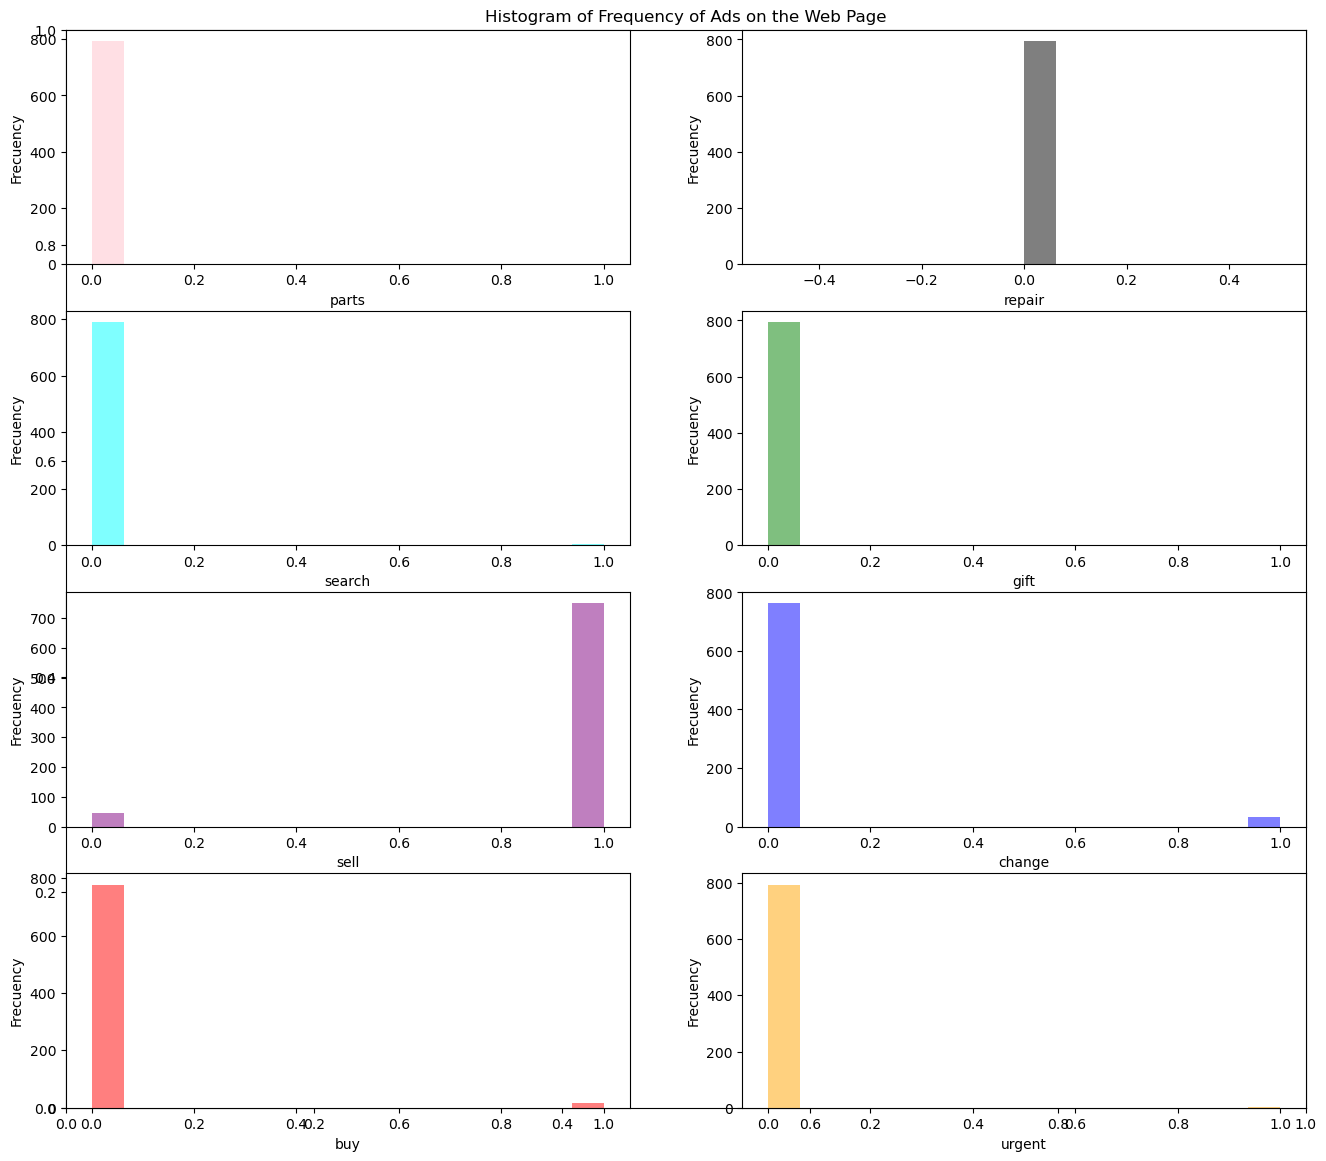

In [28]:
plt.figure(figsize=(16,14))

actions = ['urgent', 'buy', 'change', 'sell', 'gift', 'search', 'repair','parts']
colorines = ["orange","red","blue","purple","green","cyan","black","pink"]

plt.title('Histogram of Frequency of Ads on the Web Page')
for a in range(1,9):
    plt.subplot(4,2,a)
    plt.hist(ndf_copy[actions[-a]],
             bins=16, 
             color=colorines[-a], 
             alpha=0.5)
    
    plt.xlabel(actions[-a])
    plt.ylabel('Frecuency')
plt.show()

My dataset consists of 8 columns, each represented by a histogram. 

Interestingly, in the 'parts' column, which has a frequency of 800 (virtually the entire dataset), the corresponding bar on the x-axis shows a value of zero. 

The same occurs with the columns indicating items for repair, urgency, gift, and search. Despite the majority of ads expressing no interest in exchange, the number of cases requesting to buy is surprisingly low. 

On the other hand, in the 'sell' column, although the majority indicates it is not for sale, there is a considerable number of ads that are. 

This highlights the existence of exceptions within the majority observed in the dataset.

### Frequency of prices on the Web Page

First of all, we are going to visualize the price of the ads by means of a histogram to clearly see what is the price range in which the hispasonic ads move.

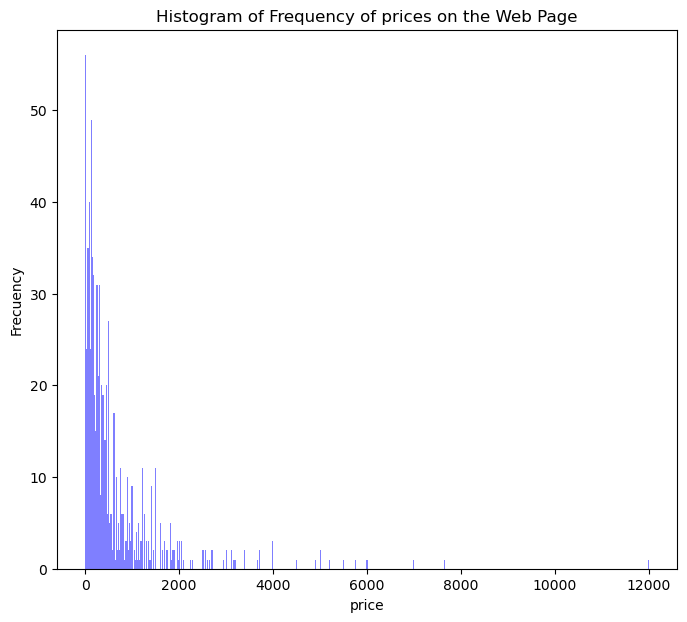

In [29]:
plt.figure(figsize=(8,7))

plt.title('Histogram of prices on the Web Page')

plt.hist(ndf_copy["price"],bins=500, color='blue', alpha=0.5)
plt.xlabel('price')
plt.ylabel('Frecuency')
plt.show()

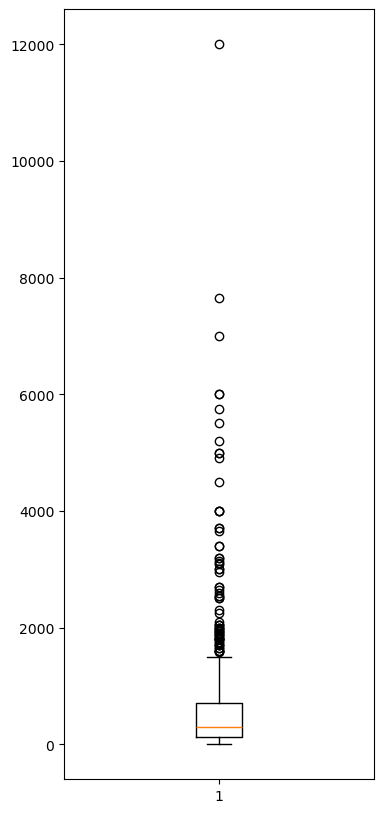

In [38]:
# Two outliers taken

fig = plt.figure(figsize =(4, 10))
arr = ndf_copy["price"]
 
plt.boxplot(arr)

plt.show()

In [39]:
ndf_copy["price"].describe()

count      795.000000
mean       624.564780
std        987.873816
min          0.000000
25%        120.000000
50%        300.000000
75%        700.000000
max      12000.000000
Name: price, dtype: float64

We'll do the same thing, but instead of doing it with a histogram, what we'll do is visualize the data using the box and cat's whisker graph that Mr. Tukey invented in his need to apply his exploratory data analysis.

The average price sold at Hispasonico does not exceed €650



Lo primero es destacar que la distribución tiene un sesgo hacia la izquierda

Se puede apreciar que tenemos anuncios desde hace mucho tiempo

el periodo de finales de 2022 hasta mediados de 2023 tiene un comportamiento mientras que a finales de 2023 tiene otro mucho mas marcado

en color naranja tenemos las fechas en las cuales expiran los anuncios.

Vamos a verque sucede entre 2023 y 2024


1. **Descriptive analysis**:
   - What is the distribution of selling prices in the dataset?
   - Are there any outliers in the sales data?
   - How are sales distributed by city and product?


### 9. Data Visualization:

We will start the visualization of the data using the histogram, which will give us information about the number of times an element is repeated.

A histogram is a graphical representation of the frequency distribution of a data set. It shows how many times each value occurs within a dataset and provides information about the relative frequency of those values. 

Therefore, by using a histogram to visualize data, you can gain insight into the number of times an item is repeated (i.e., the frequency of each value) in the dataset. This allows you to understand the distribution of the data and identify important patterns or characteristics.